In [73]:
import math                          
import numpy as np                   
import pandas as pd                  
import scipy                         
import statsmodels.api as sm        
import matplotlib.pyplot as pyplot            
import seaborn as sns               
sns.set() 
import sys
sys.setrecursionlimit(1500)

In [74]:
df=pd.read_csv('total (1).csv',encoding='latin1')
df

,content,time,title
0,Reliance Group chairman Anil Ambani has told a...,"Sep 26, 2020\r\n ,0...",Anil Ambani discloses worldwide assets; tells ...
1,"United Nations, September 24,Global labour inc...","Sep 24, 2020\r\n ,0...",Global labour income estimated to have decline...
2,"New Delhi, September 24,American cult bike man...","Sep 24, 2020\r\n ,0...","Harley Davidson to exit India, seeks local par..."
3,The rupee depreciated 26 paise to 73.83 agains...,"Sep 24, 2020\r\n ,1...",Rupee depreciates 26 paise to 73.83 against US...
4,Reliance Jio has started offering mobile servi...,"Sep 24, 2020\r\n ,0...",Jio starts offering mobile services on 22 inte...
...,...,...,...
4974,"Mumbai, Feb 23 (PTI) Fruit juice concentrate m...","24 Feb 2017,Friday",Rasna seeking ?250 cr revenue from snack categ...
4975,Former cricketer Sachin Tendulkar was spotted ...,"03 Aug 2017,Thursday",Sachin attends Rajya Sabha after questions on ...
4976,"Aamir Khan, whose last film Dangal told the st...","03 Aug 2017,Thursday",Shouldn't rob their childhood: Aamir on kids r...
4977,Maharahstra Power Minister Chandrashekhar Bawa...,"07 Dec 2016,Wednesday","Asha Bhosle gets ?53,000 power bill for unused..."


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4979 entries, 0 to 4978
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  4852 non-null   object
 1   time     4977 non-null   object
 2   title    4977 non-null   object
dtypes: object(3)
memory usage: 116.8+ KB


In [72]:
from nltk.corpus import wordnet
import nltk
nltk.download('punkt')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

import re
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
corpus=[]
for i in range(0,4500):
    content=re.sub('[^a-zA-Z]',
                   ' ',
                   str(df['content'][i]))
    content=content.lower()
    word_list = nltk.word_tokenize(content)
    word_list=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list]
    word_list = ' '.join( word_list)
    corpus.append(word_list)
corpus

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['reliance group chairman anil ambani have told a uk court that suggestion of his lavish taste be speculative because his lifestyle be very discipline a he give evidence in a dispute involve a loan agreement with three chinese bank the year old former billionaire appear via video link from mumbai before the high court on friday for compulsory cross examination in aid of an asset disclosure order obtain by the industrial and commercial bank of china ltd mumbai branch china development bank and exim bank of china the order require ambani to give full disclosure of all of his asset worldwide exceed usd my need be not vast and my lifestyle be very discipline ambani told the london court ask about his fleet of luxury car and other reference to his lavish lifestyle a the counsel for the bank cross examine him the reliance communication chief dismiss them a speculative medium story mr anil ambani have always be a simple man of simple taste contrary to exaggerated perception of his flamboyance

In [76]:
#and the clustering model will increase this score.
#We can prodict that number of Clusters are three

In [77]:
print("Done")

Done


In [78]:
from gensim.models import Word2Vec
import nltk
import numpy as np
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

In [79]:
model=Word2Vec(corpus,size=50,min_count=1,sg=1)
w2v_vectors = model.wv.vectors # here you load vectors for each word in your model
w2v_indices = {word: model.wv.vocab[word].index for word in model.wv.vocab} # here you load indices - with whom you can find an index of the particular word in your model 

In [80]:
def vectorize(line): 
    words = []
    for word in line: # line - iterable, for example list of tokens 
        try:
            w2v_idx = w2v_indices[word]
        except KeyError: # if you does not have a vector for this word in your w2v model, continue 
            continue
        words.append(w2v_vectors[w2v_idx])
        if words: 
            words = np.asarray(words)
            min_vec = words.min(axis=0)
            max_vec = words.max(axis=0)
            return np.concatenate((min_vec, max_vec))
        if not words:
            return None 

In [81]:
l=[]
for i in corpus:
    l.append(vectorize(i))
x=np.array(l)
x
features=np.array(l)

In [82]:
len(x)

4500

In [83]:
x.shape

(4500, 100)

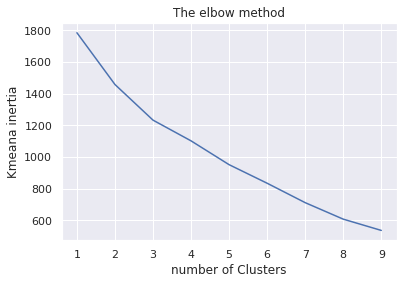

In [84]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
pyplot.plot(range(1,10),wcss) 
pyplot.title("The elbow method")
pyplot.xlabel("number of Clusters")
pyplot.ylabel("Kmeana inertia")
pyplot.show()

In [85]:
from matplotlib import pyplot
from pandas import DataFrame
import seaborn as sns 
import pandas as pd
from sklearn.metrics import silhouette_score

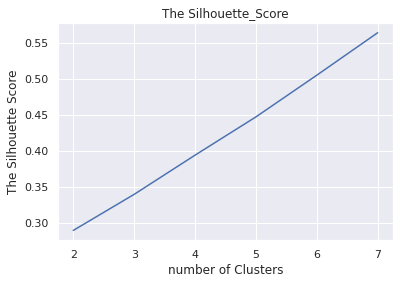

In [86]:
#Evaluation with unlabelled dataset
#The best value is 1 and the worst value is -1. 
#Values near 0 indicate overlapping clusters. 
#Negative values generally indicate that a sample has been assigned to the wrong cluster, 
#as a different cluster is more similar.
from sklearn.cluster import KMeans
Silhouette_score=[]
for i in range(2,8):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    sil_score=silhouette_score(x, labels=kmeans.fit_predict(x)) 
    Silhouette_score.append(sil_score)
Silhouette_score
number_of_Clusters=[2,3,4,5,6,7]
pyplot.plot(range(2,8),Silhouette_score) 
pyplot.title("The Silhouette_Score")
pyplot.xlabel("number of Clusters")
pyplot.ylabel("The Silhouette Score")
pyplot.show()

In [87]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_mean=kmeans.fit_predict(x)
y_means=pd.DataFrame(y_mean)
y_means=y_means.rename(columns={0:'Clusters'})
y_means

,Clusters
0,1
1,4
2,3
3,1
4,1
...,...
4495,1
4496,1
4497,3
4498,2


In [88]:
x=pd.DataFrame(x)
Final_Report=pd.concat([x,y_means],axis=1)
Final_Report

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,Clusters
0,0.008674,-0.031778,-0.067391,0.062126,0.051821,0.131138,0.087153,-0.123863,-0.002468,0.073164,-0.075186,0.070442,0.012288,-0.045287,-0.022991,0.007390,-0.030428,-0.073479,0.061482,-0.072717,-0.059699,-0.110994,0.127783,-0.040048,0.008917,0.154206,0.142071,0.105287,0.111735,0.002156,0.025270,0.021774,-0.027617,-0.182562,0.012284,0.156247,0.062575,0.185527,0.276727,0.057421,...,0.070442,0.012288,-0.045287,-0.022991,0.007390,-0.030428,-0.073479,0.061482,-0.072717,-0.059699,-0.110994,0.127783,-0.040048,0.008917,0.154206,0.142071,0.105287,0.111735,0.002156,0.025270,0.021774,-0.027617,-0.182562,0.012284,0.156247,0.062575,0.185527,0.276727,0.057421,-0.204232,0.125202,0.069474,0.057578,0.130651,0.228047,-0.127712,0.027229,0.155458,-0.017297,1
1,0.072857,-0.157470,-0.141830,-0.035806,0.042354,-0.096704,-0.023745,-0.077980,0.018602,0.052410,-0.007940,0.196761,-0.010218,-0.009101,0.091169,0.092004,-0.143536,-0.084892,-0.024029,0.083506,-0.058978,-0.137269,0.020602,0.045526,-0.031000,0.004515,0.045817,0.195877,0.177396,-0.113916,0.129132,0.094158,-0.054094,-0.313849,0.064731,0.068320,0.033611,-0.039889,0.095656,0.089619,...,0.196761,-0.010218,-0.009101,0.091169,0.092004,-0.143536,-0.084892,-0.024029,0.083506,-0.058978,-0.137269,0.020602,0.045526,-0.031000,0.004515,0.045817,0.195877,0.177396,-0.113916,0.129132,0.094158,-0.054094,-0.313849,0.064731,0.068320,0.033611,-0.039889,0.095656,0.089619,0.058603,0.049427,0.032798,-0.035409,0.239481,0.382847,-0.054471,0.187382,0.132818,0.113371,4
2,-0.068737,-0.016968,-0.130128,-0.039487,0.080145,0.154539,0.076282,-0.186606,0.005712,-0.001587,-0.073256,0.160424,0.007111,-0.070621,0.065148,-0.011812,-0.041462,0.032618,0.037211,-0.012440,-0.060434,-0.107439,-0.020741,-0.026705,-0.045198,0.182800,-0.044167,0.173631,0.043103,-0.031410,0.060597,0.014238,0.104497,-0.298712,0.139188,0.122243,0.114447,0.137324,0.271731,0.107567,...,0.160424,0.007111,-0.070621,0.065148,-0.011812,-0.041462,0.032618,0.037211,-0.012440,-0.060434,-0.107439,-0.020741,-0.026705,-0.045198,0.182800,-0.044167,0.173631,0.043103,-0.031410,0.060597,0.014238,0.104497,-0.298712,0.139188,0.122243,0.114447,0.137324,0.271731,0.107567,-0.086096,-0.076593,0.067594,-0.115858,0.049849,0.141326,-0.027824,-0.021734,0.052172,0.149451,3
3,-0.017588,-0.130021,-0.085904,0.061121,0.120098,0.078866,0.054399,-0.056093,-0.081371,0.154935,-0.032130,0.015862,-0.000155,0.050620,-0.062503,0.036132,-0.003435,0.058887,0.066276,-0.001184,-0.055350,-0.107883,0.008750,0.002194,0.042587,0.149141,0.065914,0.102757,0.086168,-0.045632,0.002377,0.083872,-0.115383,-0.173893,0.098396,0.262517,0.156865,0.081432,0.284198,-0.065131,...,0.015862,-0.000155,0.050620,-0.062503,0.036132,-0.003435,0.058887,0.066276,-0.001184,-0.055350,-0.107883,0.008750,0.002194,0.042587,0.149141,0.065914,0.102757,0.086168,-0.045632,0.002377,0.083872,-0.115383,-0.173893,0.098396,0.262517,0.156865,0.081432,0.284198,-0.065131,0.048944,0.014659,0.047260,-0.089983,0.197629,0.225856,-0.067339,0.000214,0.009234,-0.051227,1
4,0.008674,-0.031778,-0.067391,0.062126,0.051821,0.131138,0.087153,-0.123863,-0.002468,0.073164,-0.075186,0.070442,0.012288,-0.045287,-0.022991,0.007390,-0.030428,-0.073479,0.061482,-0.072717,-0.059699,-0.110994,0.127783,-0.040048,0.008917,0.154206,0.142071,0.105287,0.111735,0.002156,0.025270,0.021774,-0.027617,-0.182562,0.012284,0.156247,0.062575,0.185527,0.276727,0.057421,...,0.070442,0.012288,-0.045287,-0.022991,0.007390,-0.030428,-0.073479,0.061482,-0.072717,-0.059699,-0.110994,0.127783,-0.040048,0.008917,0.154206,0.142071,0.105287,0.111735,0.002156,0.025270,0.021774,-0.027617,-0.182562,0.012284,0.156247,0.062575,0.185527,0.276727,0.057421,-0.204232,0.125202,0.069474,0.057578,0.130651,0.228047,-0.127712,0.027229,0.155458,-0.017297,1
...,...,..

In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)
reduced_cluster_centers = pca.transform(kmeans.cluster_centers_)
#Lets reduce the dimentionality

In [90]:
reduced_features=pd.DataFrame(reduced_features)
reduced_features=reduced_features.rename(columns={0:'Feature1',1:'Feature2'})
reduced_features

,Feature1,Feature2
0,-0.177455,-0.118854
1,0.115307,-0.177169
2,-0.025533,-0.345885
3,-0.314675,0.316928
4,-0.177454,-0.118837
...,...,...
4495,-0.314675,0.316928
4496,-0.066285,0.046254
4497,-0.025533,-0.345884
4498,0.568301,0.055981


In [91]:
Final_Report=pd.concat([reduced_features,y_means],axis=1)
Final_Report

,Feature1,Feature2,Clusters
0,-0.177455,-0.118854,1
1,0.115307,-0.177169,4
2,-0.025533,-0.345885,3
3,-0.314675,0.316928,1
4,-0.177454,-0.118837,1
...,...,...,...
4495,-0.314675,0.316928,1
4496,-0.066285,0.046254,1
4497,-0.025533,-0.345884,3
4498,0.568301,0.055981,2


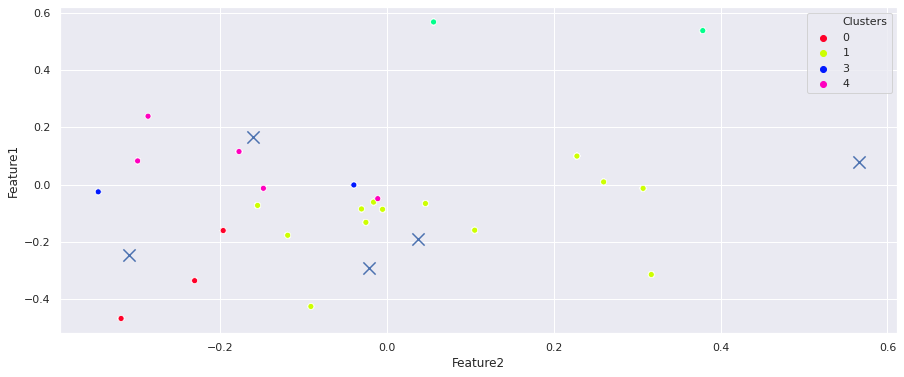

In [92]:
pyplot.figure(figsize=(15,6))
sns.scatterplot(y='Feature1',x='Feature2',data=Final_Report,hue='Clusters',palette='gist_rainbow')
pyplot.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
pyplot.legend()
pyplot.show()

In [93]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [94]:
Final_Report=pd.concat([df,y_means],axis=1)
Final_Report=Final_Report.dropna()
Final_Report

,content,time,title,Clusters
0,Reliance Group chairman Anil Ambani has told a...,"Sep 26, 2020\r\n ,0...",Anil Ambani discloses worldwide assets; tells ...,1.0
1,"United Nations, September 24,Global labour inc...","Sep 24, 2020\r\n ,0...",Global labour income estimated to have decline...,4.0
2,"New Delhi, September 24,American cult bike man...","Sep 24, 2020\r\n ,0...","Harley Davidson to exit India, seeks local par...",3.0
3,The rupee depreciated 26 paise to 73.83 agains...,"Sep 24, 2020\r\n ,1...",Rupee depreciates 26 paise to 73.83 against US...,1.0
4,Reliance Jio has started offering mobile servi...,"Sep 24, 2020\r\n ,0...",Jio starts offering mobile services on 22 inte...,1.0
...,...,...,...,...
4494,Samajwadi Party (SP) president Akhilesh Yadav ...,"29 Mar 2017,Wednesday",RSS trying to implement fundamentalist agenda:...,1.0
4495,Ten days after it began in inquiry into allega...,"29 Mar 2017,Wednesday",Molestation case against TVF CEO to be closed:...,1.0
4496,State-run Indian Oil Corp (IOC) on Monday sign...,"28 Mar 2017,Tuesday",IOC to supply 10L tonnes of fuel to Nepal for ...,1.0
4498,"A terminally-ill Houston high school student, ...","28 Mar 2017,Tuesday",BeyoncÃÂ© fulfils dying fan's wish to talk to...,2.0


In [95]:
Final_Report['Clusters'].value_counts()

1.0    2000
2.0     823
4.0     679
0.0     522
3.0     362
Name: Clusters, dtype: int64

In [96]:
#0--Medical
#1--Business
#2--Politics
#3--International
#4--Economy


In [97]:
Final_Report[Final_Report['Clusters']==4]
# Select any news from Economy Category

,content,time,title,Clusters
1,"United Nations, September 24,Global labour inc...","Sep 24, 2020\r\n ,0...",Global labour income estimated to have decline...,4.0
35,US private equity firm KKR & Co will invest Rs...,"Sep 24, 2020\r\n ,0...",KKR picks up 1.28% stake in Reliance Retail fo...,4.0
39,Impacted by disruptions caused by the Covid pa...,"Sep 24, 2020\r\n ,0...",Indian economy to shrink by 5.9%: UN,4.0
53,"Dubai, September 25,Delhi Capitals beat Chenna...","Sep 25, 2020\r\n ,0...","Delhi Capitals beat CSK by 44 runs, record sec...",4.0
59,Indian menâs team goalkeeper Gurpreet Singh ...,"Sep 26, 2020\r\n ,0...","AIFF names Gurpreet, Sanju yearâs best players",4.0
...,...,...,...,...
4468,Domestic air travellers at Delhi and six other...,"30 Mar 2017,Thursday",Stamping of hand baggage to end at 7 airports ...,4.0
4472,Days after four Nigerian students were alleged...,"30 Mar 2017,Thursday",Nigeria summons Indian envoy over Greater Noid...,4.0
4477,If there's one thing that stands out in the Na...,"29 Mar 2017,Wednesday",I have lost films in South India for being too...,4.0
4489,"In a first, a two-judge bench of the Supreme C...","29 Mar 2017,Wednesday",SC allows CCTV cameras in courtrooms for 1st time,4.0


In [98]:
Final_Report['Clusters']=Final_Report['Clusters'].replace({0:'Medical',1:'Business',2:'Politics',3:'International',4:'Economy',})

In [99]:
Final_Report['Clusters'].value_counts()

Business         2000
Politics          823
Economy           679
Medical           522
International     362
Name: Clusters, dtype: int64

In [100]:
Final_Report

,content,time,title,Clusters
0,Reliance Group chairman Anil Ambani has told a...,"Sep 26, 2020\r\n ,0...",Anil Ambani discloses worldwide assets; tells ...,Business
1,"United Nations, September 24,Global labour inc...","Sep 24, 2020\r\n ,0...",Global labour income estimated to have decline...,Economy
2,"New Delhi, September 24,American cult bike man...","Sep 24, 2020\r\n ,0...","Harley Davidson to exit India, seeks local par...",International
3,The rupee depreciated 26 paise to 73.83 agains...,"Sep 24, 2020\r\n ,1...",Rupee depreciates 26 paise to 73.83 against US...,Business
4,Reliance Jio has started offering mobile servi...,"Sep 24, 2020\r\n ,0...",Jio starts offering mobile services on 22 inte...,Business
...,...,...,...,...
4494,Samajwadi Party (SP) president Akhilesh Yadav ...,"29 Mar 2017,Wednesday",RSS trying to implement fundamentalist agenda:...,Business
4495,Ten days after it began in inquiry into allega...,"29 Mar 2017,Wednesday",Molestation case against TVF CEO to be closed:...,Business
4496,State-run Indian Oil Corp (IOC) on Monday sign...,"28 Mar 2017,Tuesday",IOC to supply 10L tonnes of fuel to Nepal for ...,Business
4498,"A terminally-ill Houston high school student, ...","28 Mar 2017,Tuesday",BeyoncÃÂ© fulfils dying fan's wish to talk to...,Politics


In [101]:
Final_Report[Final_Report['Clusters']=='Business']
# Select any news from Bollywood Category


,content,time,title,Clusters
0,Reliance Group chairman Anil Ambani has told a...,"Sep 26, 2020\r\n ,0...",Anil Ambani discloses worldwide assets; tells ...,Business
3,The rupee depreciated 26 paise to 73.83 agains...,"Sep 24, 2020\r\n ,1...",Rupee depreciates 26 paise to 73.83 against US...,Business
4,Reliance Jio has started offering mobile servi...,"Sep 24, 2020\r\n ,0...",Jio starts offering mobile services on 22 inte...,Business
5,"Shanghai, September 24,ByteDance has applied f...","Sep 24, 2020\r\n ,0...",ByteDance applies for tech export licence in C...,Business
6,Reliance Jio has started offering mobile servi...,"Sep 25, 2020\r\n ,0...",Reliance Jio begins in-flight mobile service,Business
...,...,...,...,...
4491,Two militants ransacked the house of an SP in ...,"29 Mar 2017,Wednesday",Militants ransack police superintendent's hous...,Business
4492,When Arbaaz Khan and Malaika Arora announced t...,"29 Mar 2017,Wednesday",I am dating but I feel single: Arbaaz on relat...,Business
4494,Samajwadi Party (SP) president Akhilesh Yadav ...,"29 Mar 2017,Wednesday",RSS trying to implement fundamentalist agenda:...,Business
4495,Ten days after it began in inquiry into allega...,"29 Mar 2017,Wednesday",Molestation case against TVF CEO to be closed:...,Business


In [102]:
Final_Report[(Final_Report['Clusters']=='Business') & (Final_Report['time']=='26 Jul 2017,Wednesday')]

# Select news from Business category on a partcular date and time....

,content,time,title,Clusters
944,Wonder Woman 2 is set to storm theatres on Dec...,"26 Jul 2017,Wednesday",Release date of 'Wonder Woman' sequel announced,Business
945,They were one of the most popular Bollywood bu...,"26 Jul 2017,Wednesday",Kajol hints at not working with Karan Johar in...,Business
950,"Bollywood editor and writer Apurva Asrani, bes...","26 Jul 2017,Wednesday",140 character zombies: Aligarh writer in poem ...,Business
951,"Ever since actor Sunny Leone and husband, busi...","26 Jul 2017,Wednesday",Sunny's past has no bearing on how she'll be a...,Business
953,The Indian batsmen cashed in on a flat track a...,"26 Jul 2017,Wednesday",India post their second-highest Day 1 score in...,Business
955,MTV has announced the nominees for the 2017 Vi...,"26 Jul 2017,Wednesday",Kendrick Lamar's Humble receives most nominati...,Business
962,"24 Kawariyas, 6 ITBP and Police personnel were...","26 Jul 2017,Wednesday","24 kanwarias, 6 security personnel injured in ...",Business
966,Ever yearned to swap tales of the sea with Tit...,"26 Jul 2017,Wednesday","Titanic stars Leonardo, Kate auction dinner da...",Business
967,Sikh organisations in Maharashtra have written...,"26 Jul 2017,Wednesday",Petitions against textbook calling Bhindranwal...,Business
971,"The Bombay high court, in a recent order, held...","26 Jul 2017,Wednesday",Working woman not entitled to maintenance: Bom...,Business


In [103]:
Final_Report.sample(n=10)
#Select any 10 news randomly from the corpus

,content,time,title,Clusters
4378,"Hyderabad, Mar 5 (PTI) Academy Award-winning c...","06 Apr 2017,Thursday","Never knew I was born for music, mother predic...",International
3795,Last week during the student protests in Kashm...,"15 May 2017,Monday",J&K girl who pelted stones wants to play footb...,Business
1895,The Supreme Court has held back an order to na...,"24 Jan 2017,Tuesday","SC asks BCCI, Centre to propose names of BCCI ...",Business
1029,"Ditching a lavish car, brand-new Indian Presid...","25 Jul 2017,Tuesday",Buggy used by Presidents was won over a coin t...,Economy
3396,International Cricket Council (ICC) chief exec...,"20 Jun 2017,Tuesday",ICC mulls scrapping Champions Trophy for an ex...,Economy
2033,Sidelined by the BJP in the official league of...,"15 Jan 2017,Sunday",RSS should include more women in its ranks: Ad...,Business
3531,A new fear that has gripped the hearts of the ...,"10 Jun 2017,Saturday","'Plastic rice' reports are fake, claims Tamil ...",Politics
192,"The Panorama, a visual depiction of the import...","Sep 11, 2020\r\n ,0...",Experience the legacy of Sher-e-Punjab Maharaj...,Business
1707,A special CBI court on Wednesday asked banks t...,"10 Feb 2017,Friday",Indrani forged Peter?s signature on bank docum...,Politics
3949,"There is a saying in Bengali which, roughly tr...","03 May 2017,Wednesday","85-kg calf jumps off building, falls on man in...",Business


In [104]:
print("Done")

Done
